In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df=pd.read_csv('/content/customer_churn (1).csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [7]:
df.drop('customerID',axis=1,inplace=True)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
pd.to_numeric(df['TotalCharges'],errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [11]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.shape

(7043, 20)

In [13]:
df[df.TotalCharges!=''].shape

(7043, 20)

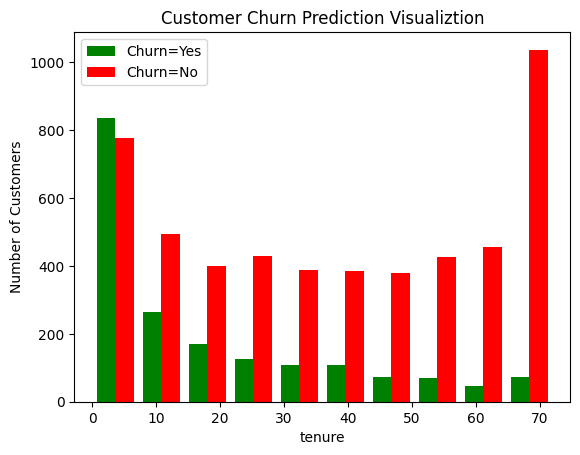

In [14]:
tenure_churn_no=df[df.Churn=='No'].tenure
tenure_churn_yes=df[df.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

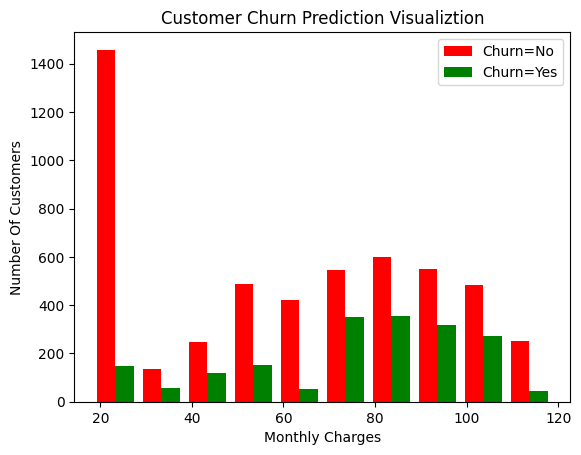

In [15]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([mc_churn_no,mc_churn_yes],color=['red','green'],label=['Churn=No','Churn=Yes'])
plt.legend()

In [16]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}:{df[column].unique()}')

In [17]:
print_unique_col_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [18]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

In [19]:
print_unique_col_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [20]:
yes_no_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_cols:
  df[col].replace({'Yes':1},inplace=True)
  df[col].replace({'No':0},inplace=True)

In [21]:
print_unique_col_values(df)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
df['gender'].replace({'Female':1},inplace=True)
df['gender'].replace({'Male':0},inplace=True)

In [24]:
for col in df:
  print(f'{col}:{df[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:[0 1]


In [25]:
df=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
df.shape

(7043, 27)

In [27]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [28]:
df=df[df.TotalCharges!=' ']

In [29]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [31]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
df=pd.DataFrame(df)

In [32]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=25,stratify=y)

In [34]:
y_train.head()

2282    1
2766    0
567     0
1854    1
2926    0
Name: Churn, dtype: int64

In [35]:
y_train.value_counts(normalize=True)

0    0.734168
1    0.265832
Name: Churn, dtype: float64

In [36]:
y.value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [37]:
y_test.value_counts(normalize=True)

0    0.734357
1    0.265643
Name: Churn, dtype: float64

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report


In [ ]:
tf.__version__


'2.12.0'

In [ ]:
!python --version


Python 3.10.12


In [ ]:
!pip install tensorflow-addons==0.19.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.4 MB/s eta 0:00:00


In [ ]:
import tensorflow_addons as tfa


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
from tensorflow_addons import losses


In [2]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from keras.api._v2.keras import activations
def ANN(X_train,y_train,X_test,y_test,loss,weights):
  model=keras.Sequential([
      keras.layers.Dense(26,input_dim=26,activation='relu'),
      keras.layers.Dense(15,activation='relu'),
      keras.layers.Dense(1,activation='sigmoid')
  ])
  model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
  if weights == -1:
        model.fit(X_train, y_train, epochs=100)
  else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
  print(model.evaluate(X_test, y_test))
  y_preds=model.predict(X_test)
  y_preds=np.round(y_preds)
  print("Classification report",classification_report(y_test,y_preds))
  return y_preds


Plan Logistic Regression with imbalanced data


In [40]:
from sklearn.metrics import classification_report
model=LogisticRegression(random_state=41)
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
cl1=classification_report(y_test,y_preds)
print(cl1)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1291
           1       0.67      0.57      0.62       467

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.81      1758



#Random Undersampling


In [41]:
count_class_0,count_class_1=df.Churn.value_counts()

In [42]:
count_class_0,count_class_1

(5163, 1869)

In [43]:
df_class_0=df[df['Churn']==0]
df_class_1=df[df['Churn']==1]

In [44]:
df_class_0_under=df_class_0.sample(count_class_1)

In [45]:
df_test_under=pd.concat([df_class_0_under,df_class_1])

In [46]:
print('Random under-sampling:')
print(df_test_under.Churn.value_counts())


Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [47]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [48]:
y_train.value_counts()


0    1495
1    1495
Name: Churn, dtype: int64

In [50]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_train,y_train)
y_preds=model1.predict(X_test)
cl1=classification_report(y_test,y_preds)
print(cl1)


              precision    recall  f1-score   support

           0       0.76      0.73      0.75       374
           1       0.74      0.77      0.76       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



Random OverSampling

In [51]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

In [52]:
print("Random over sampling")
print(df_test_over.Churn.value_counts())

Random over sampling
0    5163
1    5163
Name: Churn, dtype: int64


In [77]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [79]:
model2 = LogisticRegression(random_state=42)
model2.fit(X_train,y_train)
y_preds=model2.predict(X_test)
cl2=classification_report(y_test,y_preds)
print(cl2)


              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1033
           1       0.75      0.80      0.77      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.76      2066
weighted avg       0.77      0.77      0.76      2066



In [53]:
!pip install imbalanced-learn

SMOTE


In [54]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [55]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

In [56]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,stratify=y_sm)

In [82]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [84]:
model3=LogisticRegression(random_state=42)
model3.fit(X_train,y_train)
y_preds=model3.predict(X_test)
cl2=classification_report(y_test,y_preds)
print(cl2)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1033
           1       0.78      0.81      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [86]:
X = df.drop('Churn',axis='columns')
y = df['Churn']


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [88]:
y_train.value_counts()


0    4130
1    1495
Name: Churn, dtype: int64

In [89]:
df1=X_train.copy()
df1['Churn']=y_train

In [90]:
df1_class0=df1[df1.Churn==0]
df1_class1=df1[df1.Churn==1]

In [91]:
df1_class0.shape,df1_class1.shape

((4130, 27), (1495, 27))

2990

In [92]:
def get_train_batch(df_majority,df_minority,start,end):
  df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
  X_train=df_train.drop('Churn',axis=1)
  y_train=df_train.Churn
  return X_train,y_train

In [94]:
X_train,y_train=get_train_batch(df1_class0,df1_class1,0,1495)
model4=LogisticRegression(random_state=42)
model4.fit(X_train,y_train)
y_pred1=model4.predict(X_test)
cl3=classification_report(y_test,y_pred1)
print(cl3)

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.52      0.79      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



In [70]:
y_pred1

array([0, 0, 0, ..., 1, 1, 0])

In [95]:
X_train,y_train=get_train_batch(df1_class0,df1_class1,1495,2990)
model5=LogisticRegression(random_state=42)
model5.fit(X_train,y_train)
y_pred2=model5.predict(X_test)
cl2=classification_report(y_test,y_pred2)
print(cl2)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [96]:
X_train,y_train=get_train_batch(df1_class0,df1_class1,1495,2990)
model6=LogisticRegression(random_state=42)
model6.fit(X_train,y_train)
y_pred3=model6.predict(X_test)
cl3=classification_report(y_test,y_pred3)
print(cl3)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [97]:
y_pred_final=y_pred1.copy()
for i in range(len(y_pred1)):
  n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
  if n_ones>1:
    y_pred_final[i]=1
  else:
    y_pred_final[i]=0



In [98]:
cl_rep=classification_report(y_test,y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407

